<a href="https://colab.research.google.com/github/SabbiMonisha/Codsoft/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [7]:
data= pd.read_csv('/content/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,...,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000,5973.000000
mean,2677.615501,-0.266159,0.285505,0.844231,0.104200,0.000709,0.194948,0.018324,-0.039006,0.396916,...,-0.043098,-0.161548,-0.036483,0.028960,0.089873,-0.040197,0.025234,0.006116,65.061811,0.000502
std,1765.025532,1.395405,1.208867,1.031448,1.442339,1.185900,1.365525,1.059870,1.304005,1.047749,...,0.883330,0.646380,0.373210,0.619810,0.407680,0.488284,0.364482,0.265131,192.490314,0.022407
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-12.968670,-23.632502,-3.336805,...,-11.468435,-8.454599,-7.996811,-2.512377,-2.322906,-1.338556,-7.976100,-2.909294,0.000000,0.000000
25%,1162.250000,-1.015749,-0.280054,0.295701,-0.839417,-0.609206,-0.677720,-0.492968,-0.189736,-0.264280,...,-0.260507,-0.594625,-0.187108,-0.350226,-0.152744,-0.399334,-0.049681,-0.017776,4.450000,0.000000
50%,2537.000000,-0.420703,0.346083,0.882882,0.161767,-0.083983,-0.142606,0.041761,0.037831,0.360826,...,-0.111701,-0.177197,-0.046772,0.094946,0.106290,-0.079583,0.015976,0.019417,15.620000,0.000000
75%,3781.750000,1.115402,0.941548,1.504158,1.071412,0.441406,0.605784,0.566306,0.343067,0.961662,...,0.059809,0.273148,0.088154,0.435670,0.355157,0.245560,0.155281,0.082701,56.660000,0.000000
max,6645.000000,1.685314,7.467017,4.101716,6.013346,10.658654,21.393069,34.303177,3.877662,9.272376,...,22.580675,4.393846,4.095021,3.200201,1.972515,3.463246,3.852046,4.860769,7712.430000,1.000000


In [10]:
data.isnull().sum().sum()

13

In [11]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.93 % of the dataset
Frauds 0.05 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

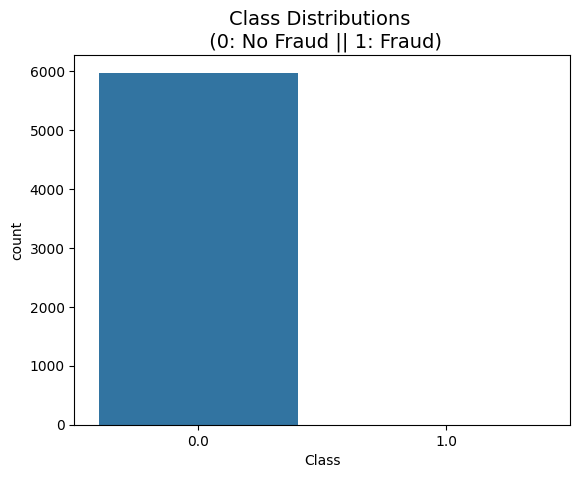

In [12]:
sns.countplot(x='Class',data = data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [13]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [14]:
class_0.describe()

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64

In [15]:
class_1.describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

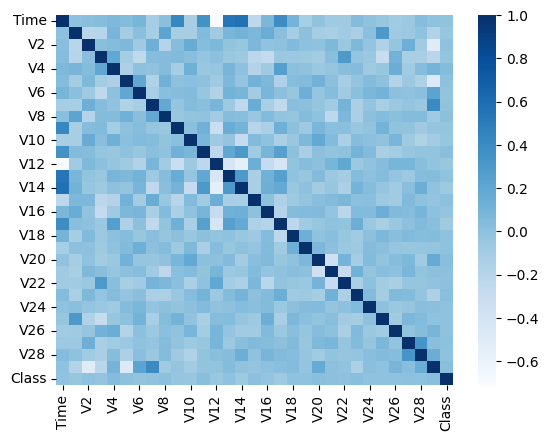

In [16]:
dataplot = sns.heatmap(data.corr(), cmap="Blues")
plt.show()

In [17]:
X = data.drop("Class", axis=1)
y = data['Class']

In [18]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 7.80191317e-01, 6.75008587e-01, ...,
        6.85623814e-01, 3.71713993e-01, 1.93998519e-02],
       [0.00000000e+00, 9.64380374e-01, 6.89617726e-01, ...,
        6.73572772e-01, 3.76318488e-01, 3.48787607e-04],
       [1.50489090e-04, 7.80296205e-01, 6.20380035e-01, ...,
        6.69652487e-01, 3.66733495e-01, 4.90973662e-02],
       ...,
       [9.98796087e-01, 7.91243498e-01, 6.90418480e-01, ...,
        7.05279980e-01, 3.98233823e-01, 1.81525148e-03],
       [9.99849511e-01, 9.55411816e-01, 6.82068381e-01, ...,
        6.65062788e-01, 3.77410008e-01, 1.81395488e-02],
       [1.00000000e+00, 8.39709462e-01, 6.72443174e-01, ...,
                   nan,            nan,            nan]])

In [19]:
import numpy as np

print(np.isnan(y).sum())


1


In [20]:
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]


In [21]:
from sklearn.model_selection import train_test_split

# Perform train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [22]:
import pandas as pd

y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())


Class
0.0    4776
1.0       2
Name: count, dtype: int64


In [23]:
print(y_train.dtype)


float64


In [24]:
# binning continuous values into discrete categories
bins = [0, 10, 20, 30]  # Adjust bins based on your data
labels = ['low', 'medium', 'high']
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_train_binned = y_train_binned.astype(str)  # Convert to string if needed


In [25]:
print(X_train.shape)


(4778, 30)


In [26]:
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)


In [29]:
from imblearn.over_sampling import SMOTE


In [31]:
y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())

Class
0.0    4776
1.0       2
Name: count, dtype: int64


In [32]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)

  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print("Accuracy : ",accuracy,"Recall : ",recall,"F1 : ",f1)

In [33]:
model_LR = LogisticRegression()

In [34]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

clf_lsr_cv = GridSearchCV(model_LR,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : nan


In [35]:
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)


In [36]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4778, 30)
Shape of X_test: (1195, 30)
Shape of y_train: (4778,)
Shape of y_test: (1195,)


In [37]:
from sklearn.linear_model import LogisticRegression

lsr_best = LogisticRegression(penalty='l2', C=1000.0, random_state=42)
lsr_clf = lsr_best.fit(X_train, y_train)


In [38]:
# Assuming evaluate is a custom function for model evaluation
# Replace 'evaluate' with the actual evaluation method
def evaluate(model, X_test, y_test):
    from sklearn.metrics import accuracy_score, classification_report
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate the model
evaluate(lsr_clf, X_test, y_test)

Accuracy: 0.999163179916318
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195



In [39]:
model_KNN = KNeighborsClassifier()

In [40]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

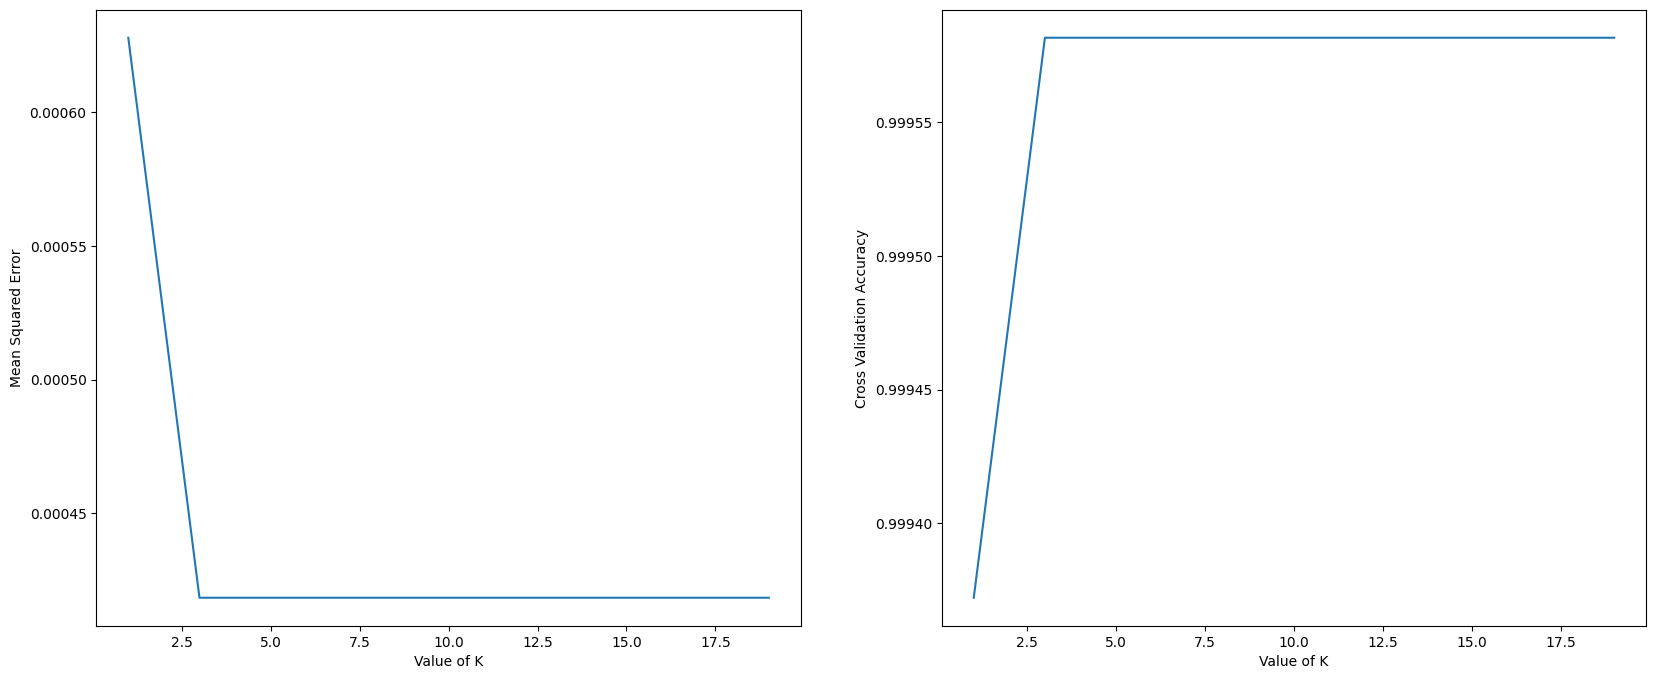

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf, X_test, y_test)


Accuracy: 0.999163179916318
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195



In [43]:
model_RFC = RandomForestClassifier()

In [44]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
clf_rfc_cv = GridSearchCV(model_RFC, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 2, 'n_estimators': 10}
accuracy : nan


In [45]:
#Fitting model

rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf, X_test, y_test)

Accuracy: 0.999163179916318
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195



In [46]:
model_ANN = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),

    Dense(16, activation='relu'),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else np.array(X_train)
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)


In [48]:
import numpy as np

if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
    X_train = X_train.values
if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
    y_train = y_train.values


In [49]:
history = model_ANN.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)


Epoch 1/50
60/60 [==============================] - 2s 6ms/step - loss: 0.2750 - accuracy: 0.9990 - val_loss: 0.0387 - val_accuracy: 0.9990
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 0.9997 - val_loss: 0.0101 - val_accuracy: 0.9990
Epoch 3/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9997 - val_loss: 0.0084 - val_accuracy: 0.9990
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0089 - val_accuracy: 0.9990
Epoch 5/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0093 - val_accuracy: 0.9990
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0093 - val_accuracy: 0.9990
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0091 - val_accuracy: 0.9990
Epoch 8/50
60/60 [==

In [50]:
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5)

38/38 [==============================] - 0s 4ms/step


In [51]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00      1195\n         1.0       0.00      0.00      0.00         0\n\n    accuracy                           1.00      1195\n   macro avg       0.50      0.50      0.50      1195\nweighted avg       1.00      1.00      1.00      1195\n'

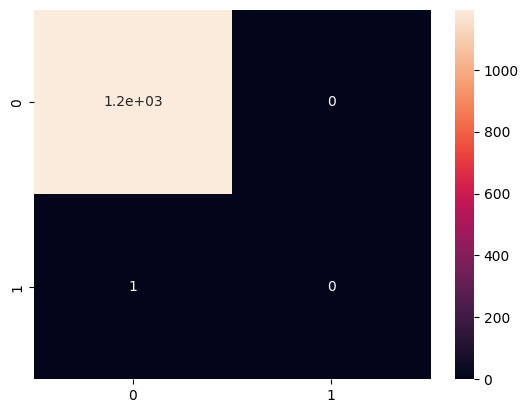

In [52]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [53]:
print(X.shape)


(5973, 30)


In [54]:
if X.ndim == 1:
    X = X.reshape(-1, 1)


In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)


In [56]:
X

array([[0.00000000e+00, 7.80191317e-01, 6.75008587e-01, ...,
        6.85623814e-01, 3.71713993e-01, 1.93998519e-02],
       [0.00000000e+00, 9.64380374e-01, 6.89617726e-01, ...,
        6.73572772e-01, 3.76318488e-01, 3.48787607e-04],
       [1.50489090e-04, 7.80296205e-01, 6.20380035e-01, ...,
        6.69652487e-01, 3.66733495e-01, 4.90973662e-02],
       ...,
       [9.98495109e-01, 7.75826727e-01, 7.40617905e-01, ...,
        6.97779110e-01, 3.45762977e-01, 9.98388316e-05],
       [9.98796087e-01, 7.91243498e-01, 6.90418480e-01, ...,
        7.05279980e-01, 3.98233823e-01, 1.81525148e-03],
       [9.99849511e-01, 9.55411816e-01, 6.82068381e-01, ...,
        6.65062788e-01, 3.77410008e-01, 1.81395488e-02]])

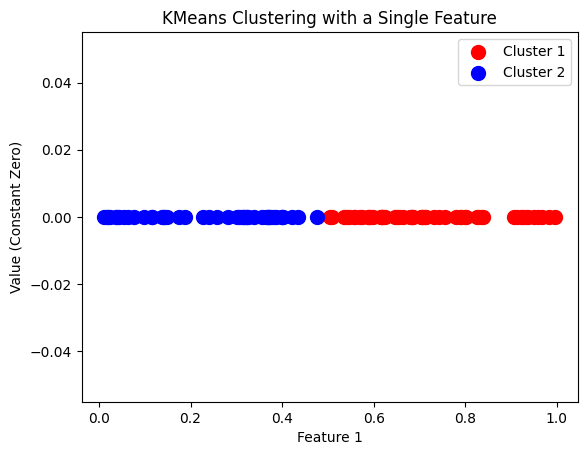

In [57]:
#Scatter plot with a single feature
from sklearn.cluster import KMeans

# Example data with a single feature
X = np.random.rand(100, 1)

# Fit and predict with KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Scatter plot with a single feature
plt.scatter(X[y_kmeans == 0], np.zeros_like(X[y_kmeans == 0]), s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1], np.zeros_like(X[y_kmeans == 1]), s=100, c='blue', label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Value (Constant Zero)')
plt.legend()
plt.title('KMeans Clustering with a Single Feature')
plt.show()


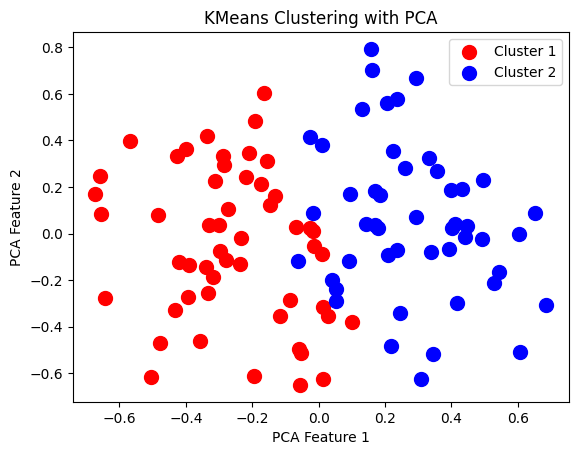

In [58]:
# OR
#Using PCA for dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Example data with multiple features
X = np.random.rand(100, 5)  # Assuming multiple features for demonstration

# Fit and predict with KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot with PCA-reduced features
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.title('KMeans Clustering with PCA')
plt.show()
